Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

  Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
  Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
  Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
  Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
  Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

Задача 2

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).


In [64]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [11]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Найдём коэффициенты линейной регрессии:

In [12]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b1

2.620538882402765

In [13]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

Итак, модель линейной регрессии имеет вид:
$$y = 444 + 2.62 \cdot x,$$*+-


In [31]:
# Подсчитаем через МНК
S = np.vstack([salary, np.ones(len(salary))]).T
c1, c0 = np.linalg.lstsq(S, scoring)[0]
print (c1, c0)

# Отличное совпадение
# Визуализируем полученные результаты на графике.

2.6205388824027653 444.1773573243599


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'цена')

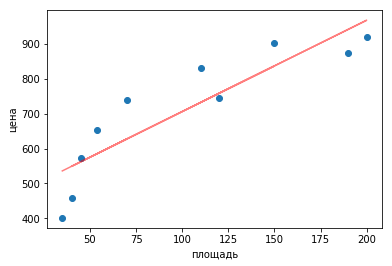

In [14]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('площадь')
plt.ylabel('цена')

In [43]:
# Посчитаем коэффициент детерминации для модели из примера 1. 
# Для этого создадим массив из предсказанных значений:
z1 = b0 + b1 * salary

print(f'real: {scoring}')
print(f'pred: {z1}')

#коэффициент детерминации:
R1 = z1.var() / scoring.var()
R1

real: [401 574 874 919 459 739 653 902 746 832]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


0.7876386635293678

In [45]:
# Средняя ошибка аппроксимации
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    
    return np.abs((y_real - y_pred) / y_real).mean()

mean_approximation_error(scoring, z1)

0.11469251843561709

In [49]:
k1 = 1
k2 = 8

T = (R1 / (1 - R1)) * (k2 / k1)
T

29.67164085966437

In [48]:
from scipy import stats
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Проверим значимость коэффициента наклона, а также построим для него доверительный интервал.

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

In [ ]:
Проверим значимость коэффициента наклона, а также построим для него доверительный интервал.

In [52]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [53]:
s_slope = standard_error_slope(salary, scoring, z1)
s_slope

0.48108279568516005

In [54]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=10)
t

2.2281388519649385

In [38]:
b0, b1

(77.89962825278835, 0.8717472118959082)

Зададим уровень значимости $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \: 10} $.

In [55]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

Гипотеза в нашем случае заключается в том, что коэффициент $b_1 = 0$. Значение статистики $T$:

In [56]:
T = b1 / s_slope
T

5.447168150485579

Значение попало в критическую область, значит, гипотеза о равенстве нулю параметра $b_1$ отвергается.

Доверительный интервал для параметра $b_1$:

In [57]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593718, 3.729917798546158)

Аналогично для параметра $b_0$:

In [59]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [60]:
s_intercept = standard_error_intercept(salary, scoring, z1)
s_intercept

56.46649755068153

Значение статистики $T$:

In [61]:
T = b0 / s_intercept
T

7.866210524668863

Значение попало в критическую область, значит, значение параметра $b_0$ является значимым.

Доверительный интервал для параметра $b_0$:

In [62]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

__Задача 2__

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [69]:
ad = pd.read_csv('anscombe_dataset.csv', index_col='id')

ad

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [78]:
x1 = ad[['x1']].values
x2 = ad[['x2']].values
x3 = ad[['x3']].values
x4 = ad[['x4']].values
y1 = ad[['y1']].values
y2 = ad[['y2']].values
y3 = ad[['y3']].values
y4 = ad[['y4']].values

In [88]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b2 = (np.mean(x2 * y2) - np.mean(x2) * np.mean(y2)) / (np.mean(x2 ** 2) - np.mean(x2) ** 2)
b3 = (np.mean(x3 * y3) - np.mean(x3) * np.mean(y3)) / (np.mean(x3 ** 2) - np.mean(x3) ** 2)
b4 = (np.mean(x4 * y4) - np.mean(x4) * np.mean(y4)) / (np.mean(x4 ** 2) - np.mean(x4) ** 2)

a1 = np.mean(y1) - b1 * np.mean(x1)
a2 = np.mean(y2) - b2 * np.mean(x2)
a3 = np.mean(y3) - b3 * np.mean(x3)
a4 = np.mean(y4) - b1 * np.mean(x4)

print(a1, b1,'\n',a2, b2,'\n', a3, b3, '\n', a4, b4)

# Как видим, коэффициенты практически идентичны

3.0000909090909245 0.5000909090909076 
 3.0009090909090768 0.5000000000000014 
 3.0024545454545555 0.4997272727272716 
 3.0000909090909227 0.49990909090909097


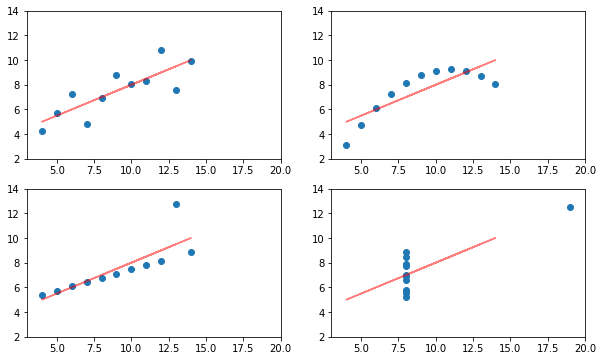

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ax1, ax2, ax3, ax4 = axes.flatten()
ox = x1
oy = a1 + b1 * ox
for i, ax in enumerate(axes.flatten()):
    x_key = f'x{i + 1}'
    y_key = f'y{i + 1}'
    
    ax.scatter(anscombe_dataset[x_key], anscombe_dataset[y_key])
    
    
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)
    
    ax.plot(ox, oy, color='red', alpha=0.5)

